## Import Libraries

In [16]:
## libraries for os operations
import os

## libraries for data preprocessing
import numpy as np 
import pandas as pd 

## libraries for visualization
import matplotlib.pyplot as plt
%matplotlib inline 

## libraries for training dl models
import tensorflow as tf
from tensorflow import keras 

## libraries for pre-trained neural network
from tensorflow.keras.applications.xception import Xception
from tensorflow.keras.applications.xception import preprocess_input
from tensorflow.keras.applications.xception import decode_predictions

## libraries for loading batch images
from tensorflow.keras.preprocessing.image import ImageDataGenerator

## ignoring warnings
import warnings 
warnings.filterwarnings('ignore')

## Load Dataset

### Building The Training And Validation Dataset

In [17]:
## lets load the training data
train_gen = ImageDataGenerator(
    preprocessing_function=preprocess_input
)

train_ds = train_gen.flow_from_directory(
    "../input/d/moro23/maize-disease-dataset/maize_disease/training_data",
    target_size=(299,299),
    batch_size=32,
)

Found 318 images belonging to 3 classes.


In [18]:
## lets load the validation data
valid_gen = ImageDataGenerator(
    preprocessing_function=preprocess_input
)

valid_ds = valid_gen.flow_from_directory(
    "../input/d/moro23/maize-disease-dataset/maize_disease/validation_data",
    target_size=(299,299),
    batch_size=32,
)

Found 85 images belonging to 3 classes.


## Creating And Training Base Model

In [19]:
def base_model(learning_rate):
    """
    """
    base_model = Xception(
        weights='imagenet',
        include_top=False,
        input_shape=(299,299,3),
    )

    base_model.trainable = False
    
    ## lets specify the size of our input image
    inputs = keras.Input(shape=(299,299,3))

    base = base_model(inputs,training=False)

    vector = keras.layers.GlobalAveragePooling2D()(base)


    outputs = keras.layers.Dense(3)(vector)

    model = keras.Model(inputs, outputs)
    
    optimizer = keras.optimizers.Adam(learning_rate)
    loss = keras.losses.CategoricalCrossentropy(from_logits=True)
    
    model.compile(optimizer= optimizer,loss= loss,metrics=['accuracy'])
    
    return model


In [20]:
history_0_01 = base_model(learning_rate = 0.01)
history_0_01.fit(train_ds, epochs=10, validation_data=valid_ds)


Epoch 1/10
10/10 [==============================] - 17s 1s/step - loss: 0.9478 - accuracy: 0.5377 - val_loss: 0.9206 - val_accuracy: 0.6941
Epoch 2/10
10/10 [==============================] - 13s 1s/step - loss: 0.5512 - accuracy: 0.7830 - val_loss: 0.7988 - val_accuracy: 0.7412
Epoch 3/10
10/10 [==============================] - 13s 1s/step - loss: 0.3776 - accuracy: 0.8491 - val_loss: 0.6833 - val_accuracy: 0.7647
Epoch 4/10
10/10 [==============================] - 13s 1s/step - loss: 0.2489 - accuracy: 0.9119 - val_loss: 0.6351 - val_accuracy: 0.7765
Epoch 5/10
10/10 [==============================] - 14s 1s/step - loss: 0.1966 - accuracy: 0.9465 - val_loss: 0.6229 - val_accuracy: 0.7529
Epoch 6/10
10/10 [==============================] - 15s 2s/step - loss: 0.1722 - accuracy: 0.9465 - val_loss: 0.6220 - val_accuracy: 0.7882
Epoch 7/10
10/10 [==============================] - 13s 1s/step - loss: 0.1389 - accuracy: 0.9717 - val_loss: 0.6486 - val_accuracy: 0.8000
Epoch 8/10
10/10 [==

## Adjusting the learning rate
- learning_rate = 0.001
- learning_rate = 0.0001


In [21]:
def make_model(learning_rate):
    
    base_model = Xception(
        weights='imagenet',
 
        input_shape=(299, 299, 3),
        include_top=False
    )
    
    base_model.trainable = False
    
    ## large scale model 
    inputs = keras.Input(shape=(299, 299, 3))
    
    base = base_model(inputs, training=False)
    
    vector = keras.layers.GlobalAveragePooling2D()(base)
    
    outputs = keras.layers.Dense(3)(vector)
    
    model = keras.Model(inputs, outputs)
    
    optimizer = keras.optimizers.Adam(learning_rate)
    
    loss = keras.losses.CategoricalCrossentropy(from_logits=True)
    
    model.compile(
        optimizer=optimizer,
        loss=loss,
        metrics=["accuracy"],
    )
    
    return model

In [22]:
history_0_001 = make_model(learning_rate=0.001)
history_0_001.fit(train_ds, epochs=10, validation_data=valid_ds)

Epoch 1/10
10/10 [==============================] - 16s 1s/step - loss: 0.9625 - accuracy: 0.5723 - val_loss: 0.8744 - val_accuracy: 0.6118
Epoch 2/10
10/10 [==============================] - 13s 1s/step - loss: 0.7056 - accuracy: 0.7044 - val_loss: 0.7839 - val_accuracy: 0.6353
Epoch 3/10
10/10 [==============================] - 13s 1s/step - loss: 0.6083 - accuracy: 0.7767 - val_loss: 0.7561 - val_accuracy: 0.6706
Epoch 4/10
10/10 [==============================] - 14s 1s/step - loss: 0.5460 - accuracy: 0.8050 - val_loss: 0.7346 - val_accuracy: 0.7176
Epoch 5/10
10/10 [==============================] - 13s 1s/step - loss: 0.5077 - accuracy: 0.8302 - val_loss: 0.7141 - val_accuracy: 0.6941
Epoch 6/10
10/10 [==============================] - 13s 1s/step - loss: 0.4744 - accuracy: 0.8428 - val_loss: 0.7015 - val_accuracy: 0.7059
Epoch 7/10
10/10 [==============================] - 13s 1s/step - loss: 0.4468 - accuracy: 0.8648 - val_loss: 0.6968 - val_accuracy: 0.7059
Epoch 8/10
10/10 [==

In [23]:
history_0_0001 = make_model(learning_rate=0.0001)
history_0_0001.fit(train_ds,epochs=10, validation_data=valid_ds)

Epoch 1/10
10/10 [==============================] - 16s 1s/step - loss: 1.1834 - accuracy: 0.2107 - val_loss: 1.1262 - val_accuracy: 0.4118
Epoch 2/10
10/10 [==============================] - 13s 1s/step - loss: 1.1215 - accuracy: 0.2925 - val_loss: 1.0797 - val_accuracy: 0.4353
Epoch 3/10
10/10 [==============================] - 13s 1s/step - loss: 1.0716 - accuracy: 0.3742 - val_loss: 1.0381 - val_accuracy: 0.4706
Epoch 4/10
10/10 [==============================] - 13s 1s/step - loss: 1.0264 - accuracy: 0.4969 - val_loss: 1.0007 - val_accuracy: 0.5765
Epoch 5/10
10/10 [==============================] - 13s 1s/step - loss: 0.9829 - accuracy: 0.5849 - val_loss: 0.9684 - val_accuracy: 0.6471
Epoch 6/10
10/10 [==============================] - 13s 1s/step - loss: 0.9449 - accuracy: 0.6509 - val_loss: 0.9398 - val_accuracy: 0.6706
Epoch 7/10
10/10 [==============================] - 13s 1s/step - loss: 0.9121 - accuracy: 0.6792 - val_loss: 0.9137 - val_accuracy: 0.6471
Epoch 8/10
10/10 [==

## Hyperparameter Tuning
- Adding One more layer
- Adding a dropouts [0.0, 0.2, 0.5, 0.8]

In [24]:
def make_model(learning_rate, dropout_rate):
    """
    Args:
    learning_rate: float
    dropout_rate: float
    """
    base_model = Xception(
        weights='imagenet',
        input_shape=(299, 299, 3),
        include_top=False
    )
    
    base_model.trainable = False
    
    inputs = keras.Input(shape=(299, 299, 3))
    
    base = base_model(inputs, training=False)
    
    vector = keras.layers.GlobalAveragePooling2D()(base)
    
    inner = keras.layers.Dense(100, activation='relu')(vector)
    ## adding a dropout
    drop = keras.layers.Dropout(dropout_rate)(inner)
    
    outputs = keras.layers.Dense(3)(drop)
    
    model = keras.Model(inputs, outputs)
    
    optimizer = keras.optimizers.Adam(learning_rate)
    
    loss = keras.losses.CategoricalCrossentropy(from_logits=True)
    
    model.compile(
        optimizer=optimizer,
        loss=loss,
        metrics=["accuracy"],
    )
    
    return model

In [27]:
model = make_model(learning_rate=0.01, dropout_rate=0.0)

history_0 = model.fit(train_ds,epochs=30,validation_data=valid_ds)

Epoch 1/30
10/10 [==============================] - 16s 1s/step - loss: 1.3868 - accuracy: 0.5660 - val_loss: 0.8994 - val_accuracy: 0.5647
Epoch 2/30
10/10 [==============================] - 14s 1s/step - loss: 0.5585 - accuracy: 0.7421 - val_loss: 0.6993 - val_accuracy: 0.7176
Epoch 3/30
10/10 [==============================] - 13s 1s/step - loss: 0.3958 - accuracy: 0.8648 - val_loss: 0.7165 - val_accuracy: 0.7176
Epoch 4/30
10/10 [==============================] - 14s 1s/step - loss: 0.2816 - accuracy: 0.8994 - val_loss: 0.6091 - val_accuracy: 0.7529
Epoch 5/30
10/10 [==============================] - 13s 1s/step - loss: 0.2026 - accuracy: 0.9245 - val_loss: 0.6667 - val_accuracy: 0.7647
Epoch 6/30
10/10 [==============================] - 14s 1s/step - loss: 0.1379 - accuracy: 0.9623 - val_loss: 0.7204 - val_accuracy: 0.7882
Epoch 7/30
10/10 [==============================] - 13s 1s/step - loss: 0.1141 - accuracy: 0.9528 - val_loss: 0.7828 - val_accuracy: 0.8118
Epoch 8/30
10/10 [==

In [28]:
model = make_model(learning_rate=0.01, dropout_rate=0.2)

history_1 = model.fit(train_ds,epochs=30,validation_data=valid_ds)

Epoch 1/30
10/10 [==============================] - 17s 2s/step - loss: 1.1349 - accuracy: 0.6069 - val_loss: 1.5089 - val_accuracy: 0.6118
Epoch 2/30
10/10 [==============================] - 13s 1s/step - loss: 0.5981 - accuracy: 0.7799 - val_loss: 0.8878 - val_accuracy: 0.6706
Epoch 3/30
10/10 [==============================] - 13s 1s/step - loss: 0.3979 - accuracy: 0.8396 - val_loss: 0.7023 - val_accuracy: 0.7765
Epoch 4/30
10/10 [==============================] - 14s 1s/step - loss: 0.3094 - accuracy: 0.8899 - val_loss: 0.7334 - val_accuracy: 0.7765
Epoch 5/30
10/10 [==============================] - 14s 1s/step - loss: 0.2606 - accuracy: 0.9025 - val_loss: 0.7310 - val_accuracy: 0.7882
Epoch 6/30
10/10 [==============================] - 13s 1s/step - loss: 0.1853 - accuracy: 0.9403 - val_loss: 0.6886 - val_accuracy: 0.7882
Epoch 7/30
10/10 [==============================] - 13s 1s/step - loss: 0.1374 - accuracy: 0.9560 - val_loss: 0.7160 - val_accuracy: 0.8118
Epoch 8/30
10/10 [==

In [29]:
model = make_model(learning_rate=0.01, dropout_rate=0.5)

history_2 = model.fit(train_ds,epochs=30,validation_data=valid_ds)

Epoch 1/30
10/10 [==============================] - 17s 1s/step - loss: 0.8993 - accuracy: 0.6006 - val_loss: 0.8492 - val_accuracy: 0.7176
Epoch 2/30
10/10 [==============================] - 13s 1s/step - loss: 0.6043 - accuracy: 0.7358 - val_loss: 0.6974 - val_accuracy: 0.7529
Epoch 3/30
10/10 [==============================] - 13s 1s/step - loss: 0.4267 - accuracy: 0.8113 - val_loss: 0.7093 - val_accuracy: 0.7412
Epoch 4/30
10/10 [==============================] - 14s 1s/step - loss: 0.4660 - accuracy: 0.7830 - val_loss: 0.6918 - val_accuracy: 0.7647
Epoch 5/30
10/10 [==============================] - 13s 1s/step - loss: 0.3924 - accuracy: 0.8302 - val_loss: 0.7656 - val_accuracy: 0.7765
Epoch 6/30
10/10 [==============================] - 14s 1s/step - loss: 0.3127 - accuracy: 0.8711 - val_loss: 0.7953 - val_accuracy: 0.7412
Epoch 7/30
10/10 [==============================] - 13s 1s/step - loss: 0.2938 - accuracy: 0.8679 - val_loss: 0.6806 - val_accuracy: 0.8118
Epoch 8/30
10/10 [==

In [31]:
model = make_model(learning_rate=0.01, dropout_rate=0.8)

history_3 = model.fit(train_ds,epochs=30,validation_data=valid_ds)

Epoch 1/30
10/10 [==============================] - 17s 2s/step - loss: 2.4626 - accuracy: 0.5126 - val_loss: 1.0024 - val_accuracy: 0.7294
Epoch 2/30
10/10 [==============================] - 13s 1s/step - loss: 0.9727 - accuracy: 0.6069 - val_loss: 0.7729 - val_accuracy: 0.7176
Epoch 3/30
10/10 [==============================] - 14s 1s/step - loss: 0.8344 - accuracy: 0.6101 - val_loss: 0.7798 - val_accuracy: 0.6353
Epoch 4/30
10/10 [==============================] - 13s 1s/step - loss: 0.7434 - accuracy: 0.6132 - val_loss: 0.7643 - val_accuracy: 0.6588
Epoch 5/30
10/10 [==============================] - 13s 1s/step - loss: 0.7627 - accuracy: 0.6132 - val_loss: 0.7694 - val_accuracy: 0.7647
Epoch 6/30
10/10 [==============================] - 13s 1s/step - loss: 0.7404 - accuracy: 0.6478 - val_loss: 0.7493 - val_accuracy: 0.7647
Epoch 7/30
10/10 [==============================] - 13s 1s/step - loss: 0.6927 - accuracy: 0.6572 - val_loss: 0.7444 - val_accuracy: 0.7176
Epoch 8/30
10/10 [==

### Plotting The Accuracy Of The Train Model

In [32]:
epochs = history_0.epoch

train00 = history_0.history['accuracy']
train02 = history_1.history['accuracy']
train05 = history_2.history['accuracy']
train08 = history_3.history['accuracy']

val00 = history_0.history['val_accuracy']
val02 = history_1.history['val_accuracy']
val05 = history_2.history['val_accuracy']
val08 = history_3.history['val_accuracy']


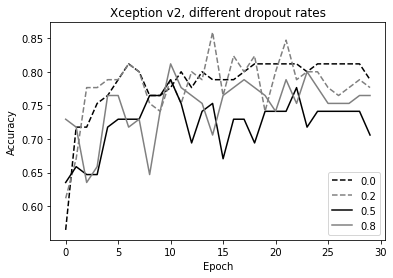

In [33]:
plt.figure(figsize=(6, 4))

plt.plot(epochs, val00, color='black', linestyle='dashed', label='0.0')
plt.plot(epochs, val02, color='grey', linestyle='dashed', label='0.2')
plt.plot(epochs, val05, color='black', linestyle='solid', label='0.5')
plt.plot(epochs, val08, color='grey', linestyle='solid', label='0.8')


plt.title('Xception v2, different dropout rates')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')


plt.legend()

#plt.savefig('xception_v2_dropout.svg')

plt.show()



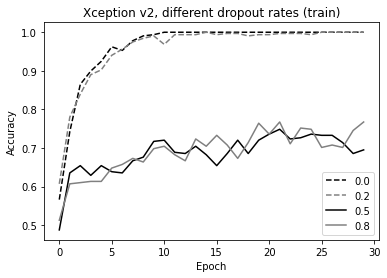

In [34]:
plt.figure(figsize=(6, 4))

plt.plot(epochs, train00, color='black', linestyle='dashed', label='0.0')
plt.plot(epochs, train02, color='grey', linestyle='dashed', label='0.2')
plt.plot(epochs, train05, color='black', linestyle='solid', label='0.5')
plt.plot(epochs, train08, color='grey', linestyle='solid', label='0.8')


plt.title('Xception v2, different dropout rates (train)')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')


plt.legend()

#plt.savefig('xception_v2_dropout_train.svg')

plt.show()

## Data Argumentation

In [35]:
da_train_gen = ImageDataGenerator(
    shear_range=10.0,
    zoom_range=0.1,
    horizontal_flip=True,
    preprocessing_function=preprocess_input

)

da_train_ds = train_gen.flow_from_directory(
    "../input/d/moro23/maize-disease-dataset/maize_disease/training_data",
    target_size=(299,299),
    batch_size=32
)

Found 318 images belonging to 3 classes.


In [36]:
da_valid_gen = ImageDataGenerator(
    shear_range=10.0,
    zoom_range=0.1,
    horizontal_flip=True,
    preprocessing_function=preprocess_input
)

da_valid_ds = valid_gen.flow_from_directory(
    "../input/d/moro23/maize-disease-dataset/maize_disease/validation_data",
    target_size=(299,299),
    batch_size=32

)

Found 85 images belonging to 3 classes.


## Training And Saving Final Model

In [39]:
model = make_model(learning_rate=0.01, dropout_rate=0.2)

checkpoint = keras.callbacks.ModelCheckpoint(
    "xception_v1_{epoch:02d}_{val_accuracy:.3f}.h5",
    save_best_only=True,
    monitor="val_accuracy",
    mode='max'
)

history = model.fit(da_train_ds, epochs=50, validation_data=da_valid_ds, callbacks=checkpoint)

Epoch 1/50
10/10 [==============================] - 18s 2s/step - loss: 1.4156 - accuracy: 0.6195 - val_loss: 0.9341 - val_accuracy: 0.7059
Epoch 2/50
10/10 [==============================] - 14s 1s/step - loss: 0.6771 - accuracy: 0.7358 - val_loss: 0.8013 - val_accuracy: 0.7176
Epoch 3/50
10/10 [==============================] - 13s 1s/step - loss: 0.4577 - accuracy: 0.8050 - val_loss: 0.7507 - val_accuracy: 0.7529
Epoch 4/50
10/10 [==============================] - 13s 1s/step - loss: 0.3796 - accuracy: 0.8239 - val_loss: 0.7302 - val_accuracy: 0.7176
Epoch 5/50
10/10 [==============================] - 13s 1s/step - loss: 0.2554 - accuracy: 0.8931 - val_loss: 0.7316 - val_accuracy: 0.7529
Epoch 6/50
10/10 [==============================] - 13s 1s/step - loss: 0.2178 - accuracy: 0.9182 - val_loss: 0.8077 - val_accuracy: 0.7412
Epoch 7/50
10/10 [==============================] - 13s 1s/step - loss: 0.1721 - accuracy: 0.9371 - val_loss: 0.8208 - val_accuracy: 0.7529
Epoch 8/50
10/10 [==